# Quantum Chemistry Tutorial 2 - Short Survey

1. **S. G. Nana Engo**, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
2. **J-P. Tchapet Njafa**, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
       
January 2024

L'objectif de ce notebook est de fournir une brève revue des principales méthodes de la chimie quantique et d'évaluer les performances. Nous allons travailler avec la molécule d'eau.

In [9]:
import pyscf

pyscf.__version__

'2.4.0'

In [10]:
from pyscf import gto

# Experimental geometry of gas-phase water
# Ref: https://cccbdb.nist.gov/expgeom2x.asp
mol_xyz = """O        0.0000   0.0000   0.1173
             H        0.0000   0.7572	 -0.4692
             H        0.0000  -0.7572	 -0.4692"""
mol = gto.M(
    atom=mol_xyz, 
    basis="6-31g", 
    verbose=4,
    charge=0,      # 0 by default
    spin=0,        # 0 by default, defined as (n_up - n_down)
    symmetry=True, # False by default
)

System: uname_result(system='Linux', node='taamangtchu-Aspire-A515-45', release='6.2.0-39-generic', version='#40~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov 16 10:53:04 UTC 2', machine='x86_64')  Threads 12
Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
numpy 1.26.2  scipy 1.11.4
Date: Fri Jan  5 22:09:27 2024
PySCF version 2.4.0
PySCF path  /home/taamangtchu/mambaforge/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 3
[INPUT] num. electrons = 10
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 O      0.000000000000   0.000000000000   0.117300000000 AA    0.000000000000   0.000000000000   0.221664874411 Bohr   0.0
[INPUT]  2 H      0.000000000000   0.757200000000  -0.469200000

In [11]:
import py3Dmol

# 3D representation
xyz_view = py3Dmol.view(width=300,height=300)
xyz_view.addModel(mol.tostring(format="xyz"),'xyz')
xyz_view.setStyle({'stick':{}})
xyz_view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Energie de gap HOMO-LUMO

La bande interdite $E_g$ se calcule en déterminant l'énergie de l'orbite moléculaire la plus occupée (HOMO) et l'énergie de l'orbite moléculaire la plus basse inoccupée (LUMO) :

$$E_g = E_{\rm LUMO} - E_{\rm HOMO}$$

![Molecule_HOMO-LUMO_diagram](Graphics/Molecule_HOMO-LUMO_diagram.png)

Chaque cercle représente ici un électron dans une orbitale ; lorsque la lumière ou l'énergie d'une fréquence suffisamment élevée est absorbée par un électron dans le HOMO, il saute vers le LUMO.

In [41]:
def find_homo_lumo(mf_pyscf, au2ev):
    """Function that returns the HOMO and LUMO index and the gap energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = mf_pyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the gap Homo-LUMO
    E_HOMO = mf_pyscf.mo_energy[homo_idx]*au2ev
    E_LUMO = mf_pyscf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g


## [Hartree-Fock](https://en.wikipedia.org/wiki/Hartree%E2%80%93Fock_method)


* Hatree-Fock (HF) est le point de départ de l'essentiel de la chimie quantique.
* Les orbitales sont optimisés de manière variationnelle pour un seul déterminant de Slater.
* En travaillant sur la base de la fonction de base centrée sur l'atome, on résoud les équations de [Roothaan-Hall](https://en.wikipedia.org/wiki/Roothaan_equations).

$$\mathbf{FC} = \mathbf{SC} \epsilon.$$

* $\mathbf{F}$ est la matrice Fock;
* $\mathbf{C}$ est la matrice des coefficients orbitaux moléculaires;
* $\mathbf{S}$ est la matrice de chevauchement orbitale atomique;
* $\epsilon$ est le vecteur des énergies orbitales moléculaires.

In [13]:
import time
from pyscf import scf

start = time.time()
myhf = scf.RHF(mol).run()
myhf_time = time.time() - start



******** <class 'pyscf.scf.hf_symm.SymAdaptedRHF'> ********
method = SymAdaptedRHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpmd9vcgrp
max_memory 4000 MB (current use 30 MB)
Freeze 0 electrons in irreps []
    10 free electrons in irreps A1 B1 B2
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
init E= -75.8343030732679
HOMO (B1) = -0.474622307499056  LUMO (A1) = 0.124028813320093
cycle= 1 E= -75.9458238773405  delta_E= -0.112  |g|= 0.419  |ddm|= 1.19
HOMO (B1) = -0.414460394475608  LUMO (A1) = 0.209091679575767
cycle= 2 E= -75.9747569680173  delta_E= -0.0289  |g|= 0.226  |ddm|= 0.406
HOMO (B1) = -0.5037246070521  LUMO (A1) = 0.197910489056943
cycle= 3 E= -75.9837994485706  delta_E= -0.00904  |g|= 0.022  |ddm|= 0.142
HOMO (B1) = 

In [36]:
from pyscf.data import nist

au2ev = nist.HARTREE2EV

Ehf_homo, Ehf_lumo, Ehf_g = find_homo_lumo(myhf, au2ev)
print(f'Homo Energy = {Ehf_homo} eV, \nLumo Energy = {Ehf_lumo} eV, \nGap Energy = {Ehf_g} eV')


Homo Energy = -13.64292814499098 eV, 
Lumo Energy = 5.541352733303217 eV, 
Gap Energy = 19.1842808782942 eV


 La méthode de Hartree-Fock présente certaines limites :

 1. **Approximation de l'échange-correlation**. La méthode de Hartree-Fock ne tient pas compte de manière exacte de l'interaction électron-électron appelée **correlation électronique**. Elle utilise une approximation connue sous le nom d'approximation de l'échange-correlation. Cette approximation simplifie l'interaction électronique en la traitant de manière moyennée, ce qui peut conduire à des erreurs significatives dans certains cas.

2. **Non-inclusion de la corrélation électronique dynamique**. La méthode de Hartree-Fock considère les électrons comme un ensemble d'orbitales indépendantes dans un champ moyen créé par les autres électrons. Cependant, elle ne prend pas en compte la corrélation électronique dynamique, c'est-à-dire les effets de corrélation qui dépendent du mouvement des électrons dans le système. Cela limite sa précision pour les systèmes où la corrélation électronique dynamique est importante, tels que les systèmes fortement corrélés ou les réactions chimiques avec des états de transition.

3. **Problèmes avec les systèmes à interaction forte**. La méthode de Hartree-Fock peut être moins précise pour les systèmes contenant des électrons fortement corrélés, tels que les systèmes avec des liaisons multiples ou des électrons non-appariés. Dans ces cas, d'autres méthodes plus avancées, telles que les méthodes de la théorie de la fonctionnelle de la densité (DFT) ou les méthodes de couplage de cluster, peuvent être nécessaires.

4. **Sensibilité aux bases de fonction**. La précision des résultats de la méthode de Hartree-Fock dépend fortement du choix des bases de fonction utilisées pour décrire les orbitales électroniques. Différentes bases de fonction peuvent donner des résultats légèrement différents, et il n'y a pas de base de fonction unique qui convient à tous les systèmes.


## Théorie de la fonctionnelle de la densité - DFT

Dans la [KS-DFT](https://en.wikipedia.org/wiki/Density_functional_theory), proposé pour la première fois par Kohn et Sham en [1964](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.B864), la densité électronique d'un système de référence sans interaction est utilisée pour représenter la densité du véritable système en interaction. En effet, Kohn et Sham stipulent qu'il existe
1. une cartographie biunivoque entre la densité électronique et le potentiel externe et
2. un principe variationnel pour la densité électronique.

En conséquence, la formulation informatique de KS-DFT ressemble à celle de la théorie de Hartree-Fock (HF), mais avec un potentiel de Fock effectif différent. Dans KS-DFT, l’énergie électronique totale est définie comme suit :
$$
    E = \mathtt{T}_e + \mathtt{V}_{\rm ext} +  \mathtt{U}_J + E_{\rm XC} ,
$$
où 
* $\mathtt{T}_e= -\sum_i\frac{\hbar^2}{2m_e}\nabla^2_i$ est l'énergie cinétique électronique sans interaction;
* $\mathtt{V}_{\rm ext} = \int\rho(\mathbf{r})\times\Big[-\sum_{i,I}\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|}\Big]d\mathbf{r}$ est l'énergie due au potentiel externe ou la répulsion Coulombienne entre les électrons et les noyaux;, 
* $ \mathtt{U}_J = +\frac12\iint\frac{\rho(\mathbf{r}_i)\rho(\mathbf{r}_j)}{|\mathbf{r}_i-\mathbf{r}_j|}d\mathbf{r}_id\mathbf{r}_j$ est l'énergie Coulombienne; 
* et $E_{\rm XC}$ est l'énergie d'échange-corrélation (*XC*) qui fournit les corrections des termes $\mathtt{T}_e$ et $\mathtt{U}_J$. En pratique, $E_{\rm XC}$ est approché par une approximation fonctionnelle de la densité, qui elle-même peuvent être divisée en plusieurs classes le long de différents échelons de l'échelle de Jacob :
    * approximations de densité locale (par exemple LDA ; *XC* l'énergie dépend uniquement de la densité électronique, $\rho$),
    * approximations généralisées du gradient (GGA ; l'énergie *XC* dépend également du gradient de densité, $|\nabla\rho|$),
    * méta-GGA (l'énergie *XC* dépend aussi de la densité d'énergie cinétique et/ou de la densité laplacienne, $\sum_i |\nabla \psi_i|^2$, $\nabla^2\rho$ ; ce dernier n'est pas supporté dans PySCF pour le moment),
    * fonctionnelles de corrélation non locales (l'énergie *XC* implique une double intégrale)
    * fonctionnelles de densité hybride (une fraction de l'échange exact est utilisée), et
    * fonctionnelles de densité corrigées à longue portée (l'échange exact est utilisé avec un noyau d'interaction modifié)

* PySCF donne aux utilisateurs l'accès à un grand nombre de fonctionnalités via les bibliothèques [libXC](https://tddft.org/programs/libXC/) et [XCfun](https://github.com/dftlibs/XCfun).

![DFT_Accuracy.jpg](./Graphics/DFT_Accuracy.jpg)

Ainsi, l'Hamiltonien à un électron permettant de calculer l'énergie totale d'une orbitale électronique est

$$\hat{h}_{\rm KS} \phi_i(\mathbf{r}_i) = \Big[-\frac12 \nabla_i^2 + -\sum_I\frac{Z_I}{|\mathbf{r}_i-\mathbf{R}_I|} + 
\int\frac{\rho(\mathbf{r}_j)}{|\mathbf{r}_i-\mathbf{r}_j|}d\mathbf{r}_j +  \mathtt{V}_{\rm XC}[\rho(\mathbf{r}_i)] \Big] \phi_i(r) = \epsilon_i \phi_i(\mathbf{r}_i).$$

Les solutions des états propres de cette équation peuvent être utilisées pour trouver une densité qui, par sa construction, reproduit la densité exacte du système complet en interaction :

$$\rho(\mathbf{r}_i)=2\sum_i |\phi_i^{\rm KS}(\mathbf{r}_i)|^2.$$

![DFT_Flowchart.jpg](Graphics/DFT_Flowchart.jpg)


In [38]:
from pyscf import dft

start = time.time()
myks = dft.RKS(mol, xc="B3LYP").run() #optional: use density fitting to accelerate integral evaluation
# scf.KS(mol).density_fit()
myks_time = time.time() - start



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmpiwu8j2w0
max_memory 4000 MB (current use 43 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3LYP
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7f734e4d2170>
grids dens level: 3
symmetrized grids: True
atomic radii adjust function: <function treutler

tot grids = 34312
init E= -76.3437620065598
HOMO (B1) = -0.427004269910516  LUMO (A1) = 0.0220209634819467
cycle= 1 E= -76.2921493339693  delta_E= 0.0516  |g|= 0.693  |ddm|= 1.24
HOMO (B1) = -0.121174052992213  LUMO (A1) = 0.0974497725153828
cycle= 2 E= -76.2019082085522  delta_E= 0.0902  |g|= 0.988  |ddm|= 1.19
HOMO (B1) = -0.296459109722756  LUMO (A1) = 0.0533250482727196
cycle= 3 E= -76.3849337323309  delta_E= -0.183  |g|= 0.008  |ddm|= 0.73
HOMO (B1) = -0.292007333683094  LUMO (A1) = 0.0575676485970033
cycle= 4 E= -76.3849507487675  delta_E= -1.7e-05  |g|= 0.000886  |ddm|= 0.00987
HOMO (B1) = -0.2923103461833  LUMO (A1) = 0.0573913746859993
cycle= 5 E= -76.3849509192971  delta_E= -1.71e-07  |g|= 6.87e-05  |ddm|= 0.000893
HOMO (B1) = -0.292334873671957  LUMO (A1) = 0.0573914558443268
cycle= 6 E= -76.3849509207112  delta_E= -1.41e-09  |g|= 9.62e-06  |ddm|= 0.000109
HOMO (B1) = -0.292332670192075  LUMO (A1) = 0.0573914459021829
cycle= 7 E= -76.3849509207307  delta_E= -1.95e-11  |g|= 6

In [39]:
Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myks)
print(f'Homo Energy = {Eks_homo} eV, \nLumo Energy = {Eks_lumo} eV, \nGap Energy = {Eks_g} eV')


Homo Energy = -7.9547689226604 eV, 
Lumo Energy = 1.5617036940561446 eV, 
Gap Energy = 9.516472616716545 eV


Bien que la DFT présente de nombreux avantages, elle comporte également certaines limitations importantes :

1. **Approximation de l'échange-correlation**. Tout comme la méthode de Hartree-Fock, la DFT repose sur une approximation de l'échange-correlation. Différentes approximations sont disponibles, telles que l'approximation de la fonctionnelle de l'échange-corrélation locale (LDA) ou l'approximation de la fonctionnelle de l'échange-corrélation généralisée (GGA). Ces approximations peuvent être moins précises dans certains cas, conduisant à des résultats moins précis pour certaines propriétés chimiques.

2. **Difficulté à traiter les interactions à longue portée**. La DFT est moins efficace pour traiter les interactions à longue portée, telles que les interactions de dispersion (van der Waals). Les approximations standard de la DFT ne capturent pas correctement ces interactions, ce qui peut conduire à des erreurs significatives lors de la modélisation de systèmes moléculaires ou de matériaux qui dépendent fortement de ces interactions.

3. **Prise en compte incomplète de la corrélation électronique dynamique**. Bien que la DFT prenne en compte certaines contributions de la corrélation électronique, elle n'inclut généralement pas de manière exacte la corrélation électronique dynamique, qui est importante dans les systèmes avec des états de transition, des réactions chimiques et des propriétés d'excitation. Des méthodes plus avancées, telles que la DFT à deux électrons (DFT à deux particules), sont nécessaires pour capturer plus précisément ces effets de corrélation électronique dynamique.

4. **Sensibilité aux bases de fonction**. Comme pour la méthode de Hartree-Fock, la précision des résultats de la DFT dépend du choix des bases de fonction. Différentes approximations de la fonctionnelle de l'échange-corrélation peuvent nécessiter des bases de fonction spécifiques, et il n'y a pas de base de fonction unique qui convient à tous les systèmes.

5. **Problèmes avec les systèmes fortement corrélés**. La DFT peut être moins précise pour les systèmes avec des électrons fortement corrélés, tels que les systèmes avec des liaisons multiples ou des électrons fortement localisés. Dans ces cas, des méthodes plus avancées, telles que la DFT à la dynamique exacte des échanges, sont nécessaires pour obtenir des résultats précis.


## Théorie des perturbations de Møller-Plesset - MP2

* La [MP2](https://en.wikipedia.org/wiki/M%C3%B8ller%E2%80%93Plesset_perturbation_theory) effectue des corrections perturbatives de l'approximation Hartree-Fock.

In [15]:
from pyscf import mp

start = time.time()
mymp2 = mp.MP2(myhf).run()
mymp2_time = time.time() - start + myhf_time


******** <class 'pyscf.mp.mp2.MP2'> ********
nocc = 5, nmo = 13
max_memory 4000 MB (current use 73 MB)
E(MP2) = -76.1128253908809  E_corr = -0.128850918159198
E(SCS-MP2) = -76.1124627493824  E_corr = -0.128488276660723
E_corr(same-spin) = -0.0301532597657485
E_corr(oppo-spin) = -0.0986976583934499


## Cluster couplé - CC

* La [CC](https://en.wikipedia.org/wiki/Coupled_cluster) est une méthode perturbative qui améliore l'approximation de Hartree-Fock.
* Les clusters couplés simples et doubles (CCSD) incluent une excitation simple et double en plus de la fonction d'état HF.
* La précision peut être améliorée en incluant les triples de manière perturbatrice (CCSD(T)).
* Description non variationnelle, mais détaillée des états fondamentaux. 
* L'extension aux états excités est l'EOM-CCSD.

In [16]:
from pyscf import cc

start = time.time()
mycc = cc.CCSD(myhf).run()
mycc_time = time.time() - start + myhf_time


******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 5, nmo = 13
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 75 MB)


Init t2, MP2 energy = -76.1128253971341  E_corr(MP2) -0.128850924412438
Init E_corr(CCSD) = -0.128850924412629
cycle = 1  E_corr(CCSD) = -0.131108130968237  dE = -0.00225720656  norm(t1,t2) = 0.0228787
cycle = 2  E_corr(CCSD) = -0.133971459205635  dE = -0.00286332824  norm(t1,t2) = 0.00827705
cycle = 3  E_corr(CCSD) = -0.135274692633286  dE = -0.00130323343  norm(t1,t2) = 0.00329509
cycle = 4  E_corr(CCSD) = -0.135395198809584  dE = -0.000120506176  norm(t1,t2) = 0.000547317
cycle = 5  E_corr(CCSD) = -0.135382726868841  dE = 1.24719407e-05  norm(t1,t2) = 0.000202845
cycle = 6  E_corr(CCSD) = -0.135379406531295  dE = 3.32033755e-06  norm(t1,t2) = 5.06174e-05
cycle = 7  E_corr(CCSD) = -0.135379879258624  dE = -4.72727328e-07  norm(t1,t2) = 1.08852e-05
cycle = 8  E_corr(CCSD) = -0.135379510430962  dE = 3.68827661e-07  norm(t1,t2) = 2.91755e-06
cycle = 9  E_corr(CCSD) = -0.135379510791862  dE = -3.60899116e-10  norm(t1,t2) = 5.44171e-07
CCSD converged
E(CCSD) = -76.11935398351358  E_corr =

In [17]:
e_ccsd_t = mycc.ccsd_t()
mycct_time = time.time() - start + myhf_time

CCSD(T) correction = -0.000995860106834937


## Interaction de configuration complète - FCI

* L'[interaction de configuration complète (FCI)](https://en.wikipedia.org/wiki/Full_configuration_interaction) est exacte pour un choix donné d'ensemble de base.
* Le coût computationnel augmente de façon exponentielle avec la taille du système.
* Également connue sous le nom de **diagonalisation exacte**.

In [18]:
from pyscf import fci

start = time.time()
myfci = fci.FCI(myhf)
myfci.kernel()
myfci_time = time.time() - start + myhf_time

## Synthèse des méthodes HF et post-HF

Les données importantes sont enregistrées dans les objets de la méthode PYSCF, ce qui facilite l'analyse et la visualisation.

In [40]:
# Collect data

methods = ["HF", "MP2", "CCSD", "CCSD(T)", "DFT", "FCI"]
energies = [myhf.e_tot, mymp2.e_tot, mycc.e_tot, mycc.e_tot + e_ccsd_t, myks.e_tot, myfci.e_tot]
mf_times = [myhf_time, mymp2_time, mycc_time, mycct_time, myks_time, myfci_time]


In [ ]:
# Create the results dataframe
import pandas as pd

df_Eies = pd.DataFrame({"Energy":energies, "Time":mf_times,
                        "Delta E(kcal/mol)":abs(energies-myfci.e_tot)*627.5}, 
                        index = methods)

df_Eies

,Energy,Time,Delta E in kcal/mol
HF,-75.983974,0.372188,85.904670
MP2,-76.112825,0.464979,5.050719
CCSD,-76.119354,0.875498,0.954027
CCSD(T),-76.120350,1.001239,0.329125
DFT,-76.384951,2.435868,165.708051
FCI,-76.120874,4.842882,0.000000


On note que les méthodes HF et MP2 produisent ici des différences d'énergie 86 et 5 kcal/mol respectivement, bien supérieure à [précision chimique](https://en.wikipedia.org/wiki/Computational_chemistry) (1 kcal/mol).

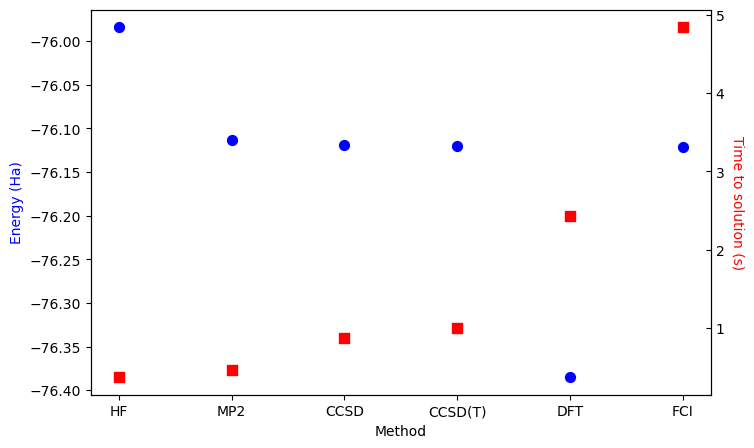

In [ ]:
# Plotting
import matplotlib.pyplot as plt

# Create the matplotlib figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot the energies
ax.set_xticks(range(len(methods)), methods)
ax.set_xlabel("Method")
ax.set_ylabel("Energy (Ha)", color="b")
ax.scatter(range(len(methods)), energies, marker="o", s=50, color="b")
ax.set_xlabel("Method")

# Plot the time to solution
ax_time = ax.twinx()
ax_time.scatter(range(len(methods)), mf_times, marker="s", s=50, color="r")
ax_time.set_ylabel("Time to solution (s)", color="r", rotation=270, va="bottom")

# Show the graph
plt.tick_params(axis="both", direction="in")
plt.show()

De ce qui précède, il apparaît que, pour un même ensemble de bases chimiques de dimension moyenne, de taille $N$,
* en termes de **précision**, on a l’ordre suivant :

HF < MP2 < CCSD < CCSD(T) < FCI

* tn termes de **temps de calculs**, 

HF ($N^4$) < MP2 ($N^5$) < CCSD ($N^6$)  < CCSD(T) ($N^7$) < FCI ($N!$) 